# Building the Toffoli gate

It is known that by working with the CNOT gate and unitary gates we can build any other type of gates. One of the important challenges of quantum computing is to build the Toffoli gate from these. Reading an old work we have found the following equivalence:

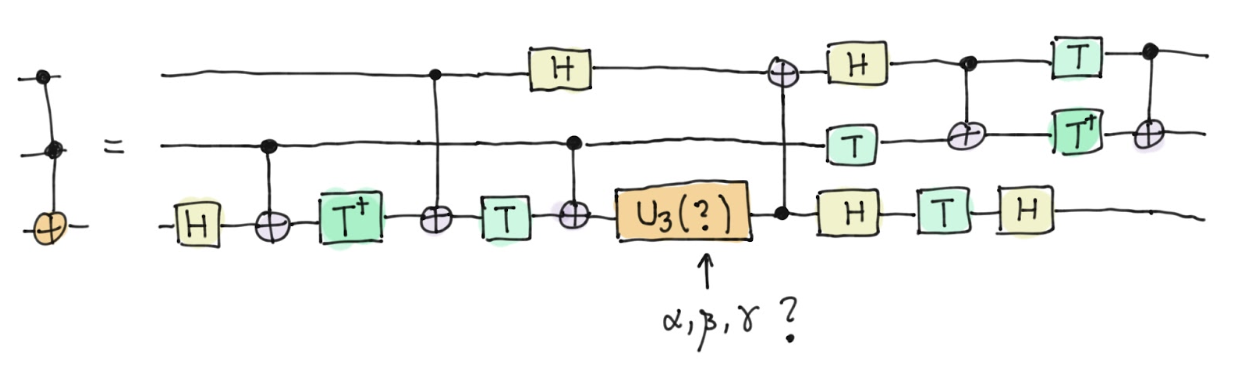![img](toffoli-2.jpeg)

Unfortunately, the parameters of the U3 gate have deteriorated and we cannot remember their value. 
Could you calculate these values?


In [1]:
import pennylane as qml
import numpy as np

# Original Toffoli

In [2]:
dev1 = qml.device("default.qubit", wires=3)
@qml.qnode(dev1)
def original_toff():
    qml.Toffoli(wires=[0,1,2])
    
    return qml.state()

In [3]:
print(qml.draw(original_toff)())

0: ─╭●─┤  State
1: ─├●─┤  State
2: ─╰X─┤  State


In [4]:
original_toff()

tensor([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j], requires_grad=True)

# Toffoli decomposition

In [5]:
dev2 = qml.device("default.qubit", wires=3)
@qml.qnode(dev2)
def decompose_toff(alfa,beta,gamma):
    qml.Hadamard(wires=2)
    qml.CNOT(wires=[1,2])
    qml.adjoint(qml.T(wires=2))
    qml.CNOT(wires=[0,2])
    qml.T(wires=2)
    qml.CNOT(wires=[1,2])
    qml.Hadamard(wires=0)
    qml.U3(alfa, beta, gamma, wires=2)
    qml.CNOT(wires=[2,0])
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=2)
    qml.T(wires=1)
    qml.T(wires=2)
    qml.CNOT(wires=[0,1])
    qml.adjoint(qml.T(wires=1))
    qml.T(wires=0)
    qml.CNOT(wires=[0,1])
    
    return qml.state()

In [6]:
print(qml.draw(decompose_toff)(alfa=0,beta=0,gamma=0))

0: ───────────╭●──H────────────────────────╭X──H─╭●──T──╭●─┤  State
1: ────╭●─────│─────╭●─────────────────────│───T─╰X──T†─╰X─┤  State
2: ──H─╰X──T†─╰X──T─╰X──U3(0.00,0.00,0.00)─╰●──H──T────────┤  State


In [7]:
decompose_toff(alfa=0,beta=0,gamma=0)

tensor([ 1.00000000e+00+0.00000000e+00j, -3.92523115e-17-3.92523115e-17j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j], requires_grad=True)

In [8]:
# testing the difference. Must be near to zero
original_toff() - decompose_toff(alfa=0,beta=0,gamma=0)

tensor([2.22044605e-16+0.00000000e+00j, 3.92523115e-17+3.92523115e-17j,
        0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j], requires_grad=True)

You don´t need any rotation on the qubit 3. The decomposition must be only with CNOT, T and H gates